In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob
from scipy import stats

In [12]:
path = os.getcwd()
parent_directory = os.path.dirname(path)
path = os.path.join(parent_directory, 'Data')

list_folders = [f.path for f in os.scandir(path) if f.is_dir()]

ISTELL_results_list=[]

for folder in list_folders:
    MSE_paths = glob.glob(os.path.join(Path(folder), "R2history_*"))
    
    if len(MSE_paths) != 0:
        print(MSE_paths)
        for path in MSE_paths:
            ISTELL_results_list.append(np.loadtxt(path,usecols=0))

['/home/madeira/ISTELL_PPCF/Uniform_grid/VV_study/Data/circular_cs/R2history_K21500_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Uniform_grid/VV_study/Data/eq_cs_rext/R2history_K15000_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Uniform_grid/VV_study/Data/eq_cs_Veff/R2history_K21500_nphi64_ntheta64.txt']


In [8]:
eff_vol_list = []

for folder in list_folders:
    eff_vol_paths = glob.glob(os.path.join(folder, "eff_vol_history_*"))
    
    if len(eff_vol_paths) != 0:
        print(eff_vol_paths)
        for path in eff_vol_paths:
            eff_vol_list.append(np.loadtxt(path,usecols=0))

['/home/madeira/ISTELL_PPCF/Uniform_grid/VV_study/Data/circular_cs/eff_vol_history_K21500_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Uniform_grid/VV_study/Data/eq_cs_rext/eff_vol_history_K15000_nphi64_ntheta64.txt']
['/home/madeira/ISTELL_PPCF/Uniform_grid/VV_study/Data/eq_cs_Veff/eff_vol_history_K21500_nphi64_ntheta64.txt']


5.999952442205285e-06
6.039944885153797e-05
5.425996062021864e-05


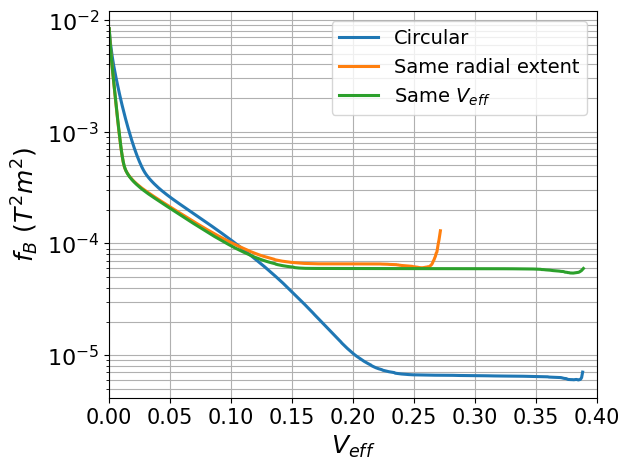

In [13]:
plt.figure()
plt.xlabel(r'$V_{eff}$',fontsize=18)
plt.ylabel(r'$f_B$ $(T^2m^2)$', fontsize=18)

legend = ["Circular", "Same radial extent", r"Same $V_{eff}$"]
for i in range(len(eff_vol_list)):
    plt.semilogy(eff_vol_list[i], ISTELL_results_list[i],linewidth=2.2)
    print(min(ISTELL_results_list[i]))

plt.xlim(0,0.4)        
plt.xticks(fontsize=15)

plt.yticks(fontsize=16)
leg = plt.legend(legend,fontsize=14)
plt.grid(which='both')
plt.tight_layout()
plt.savefig("../Plots/ISTELL_uniform_fB.pdf")

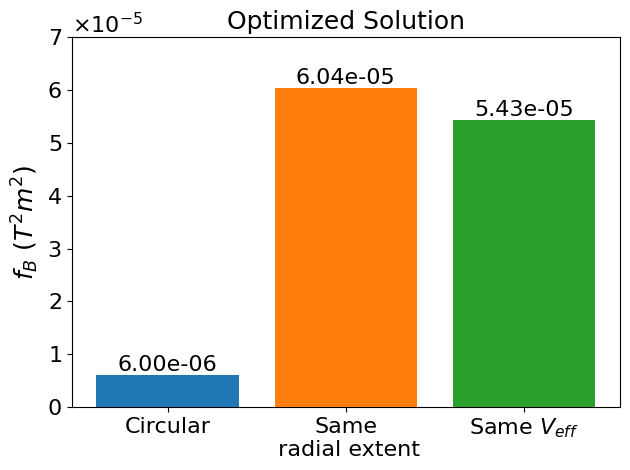

In [14]:
fig, ax = plt.subplots()
ax.ticklabel_format(style="sci",axis='y',scilimits=(0,0), useLocale=None, useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(16)
#ax.tick_params(axis='both', which='both', labelsize=16)
legend = ["Circular", "Same\n radial extent", r"Same $V_{eff}$"]
counts = []
for i in range(len(eff_vol_list)):
    counts.append(min(ISTELL_results_list[i]))
    
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

bar = ax.bar(legend, counts, color=bar_colors,zorder=3)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2e}', ha='center', va='bottom',fontsize=16)
    
ax.set_ylabel(r'$f_B$ $(T^2m^2)$',fontsize=18)
ax.set_title('Optimized Solution',fontsize=18)
#ax.grid(axis='y',zorder=0)
ax.set_ylim(0,7e-5)

plt.xticks(legend, legend,  ha='center', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig("../Plots/ISTELL_uniform_fB_barplot.pdf")
